In [7]:
from google.colab import files
uploaded = files.upload()

Saving Travel details dataset.csv to Travel details dataset.csv


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
plt.style.use('fivethirtyeight')
df=pd.read_csv("Travel details dataset.csv")
df.head()
df.rename(columns={'Start date':'Start','End date':'End','Duration (days)':'Duration','Traveler name':'name','Traveler age':'age','Traveler gender':'gender','Traveler nationality':'nationality'},inplace=True)
df.head()

,Trip ID,Destination,Start,End,Duration,name,age,gender,nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700
3,4,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200


In [15]:
df.dropna(inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Trip ID              139 non-null    int64         
 1   Destination          137 non-null    object        
 2   Start                137 non-null    datetime64[ns]
 3   End                  137 non-null    datetime64[ns]
 4   Duration             137 non-null    float64       
 5   name                 137 non-null    object        
 6   age                  137 non-null    float64       
 7   gender               137 non-null    object        
 8   nationality          137 non-null    object        
 9   Accommodation type   137 non-null    object        
 10  Accommodation cost   137 non-null    object        
 11  Transportation type  136 non-null    object        
 12  Transportation cost  136 non-null    object        
dtypes: datetime64[ns](2), float64(2), i

In [23]:
city_country = {'Paris':'France','Bali':'Indonesia','Tokyo':'Japan','Sydney':'Australia','Rome':'Italy',
                'New York':'USA','Rio de Janeiro':'Brazil','Bangkok':'Thailand','Cancun':'Mexico','Barcelona':'Spain',
                'London':'UK','Vancouver':'Canada','Cape Town':'South Africa','Dubai':'United Arab Emirates',
                'Amsterdam':'Netherlands','Seoul':'South Korea','Los Angeles':'USA','Phuket':'Thailand','Auckland':'New Zealand',
                'Santorini':'Greece','Athens':'Greece','Phnom Penh':'Cambodia','Honolulu':'Hawaii','Berlin':'Germany',
                'Marrakech':'Morocco','Edinburgh':'Scotland'}

In [25]:
import pandas as pd

# Sample data (you should replace this with your actual DataFrame)
data = {'Destination': ['New York, USA', 'Paris, France', 123.45, 'Berlin, Germany']}
df = pd.DataFrame(data)

# Ensure all values in 'Destination' are strings
df['Destination'] = df['Destination'].astype(str)

# Split the 'Destination' column into 'city' and 'country'
dest = pd.DataFrame(df['Destination'].str.split(', ').tolist(), columns=['city', 'country']).head(30)

# Create a mapping of cities to countries (replace with your actual mapping)
city_country = {'New York': 'USA', 'Paris': 'France', 'Berlin': 'Germany'}

# Fill in missing 'country' values
dest.loc[dest['country'].isna() & dest['city'].isin(city_country.keys()), 'country'] = dest.loc[dest['country'].isna() & dest['city'].isin(city_country.keys()), 'city']

# Nullify 'city' values if they match the country values
dest.loc[dest['city'].isin(city_country.values()), 'city'] = None

# Map 'city' to 'country' using the provided city-country mapping
dest.loc[dest['country'].isna(), 'country'] = dest.loc[dest['country'].isna(), 'city'].map(city_country)

# Map 'country' back to 'city' using the inverted city-country mapping
dest.loc[dest['city'].isna(), 'city'] = dest.loc[dest['city'].isna(), 'country'].map({v: k for k, v in city_country.items()})

# Display the resulting DataFrame
print(dest)


       city  country
0  New York      USA
1     Paris   France
2    123.45      NaN
3    Berlin  Germany


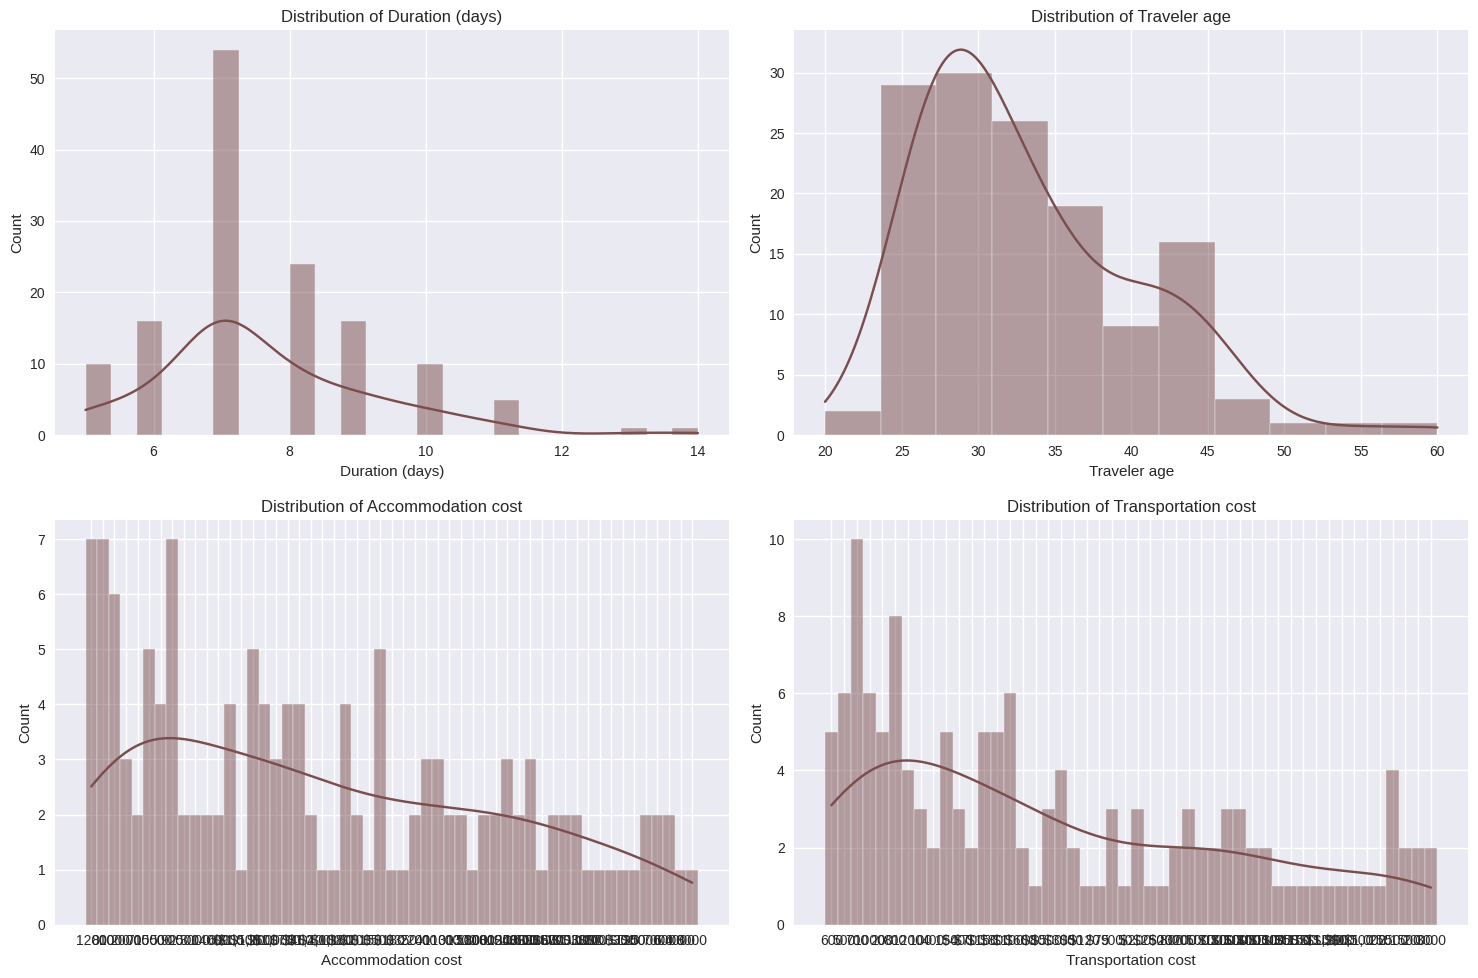

In [34]:
# prompt: i want pink color graphs for above code

import seaborn as sns

# Set the color palette to pink
sns.set_palette("pink")

# Load dataset
df = pd.read_csv('Travel details dataset.csv')

# Adjust the column names as per your dataset
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['Duration (days)'], kde=True)
plt.title('Distribution of Duration (days)')

plt.subplot(2, 2, 2)
sns.histplot(df['Traveler age'], kde=True)
plt.title('Distribution of Traveler age')

plt.subplot(2, 2, 3)
sns.histplot(df['Accommodation cost'], kde=True)
plt.title('Distribution of Accommodation cost')

plt.subplot(2, 2, 4)
sns.histplot(df['Transportation cost'], kde=True)
plt.title('Distribution of Transportation cost')

plt.tight_layout()
plt.show()


In [36]:
pip install seaborn matplotlib


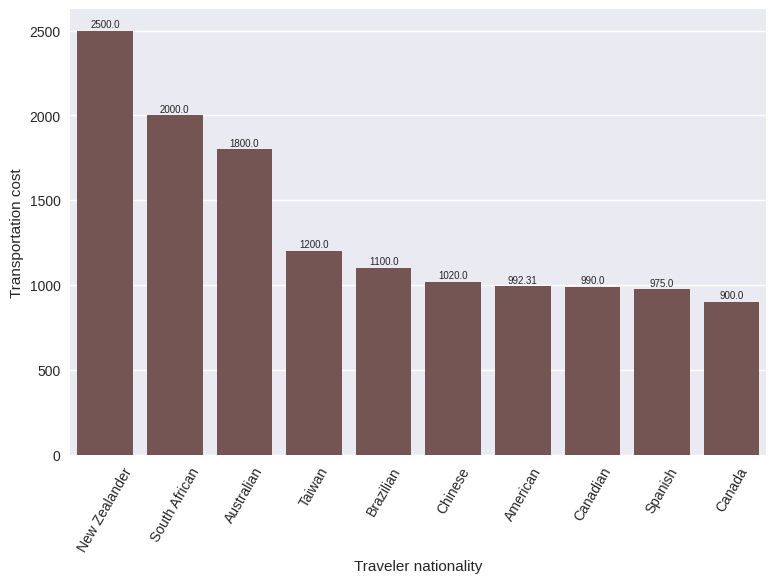

In [46]:
# Convert 'Transportation cost' column to numeric
df['Transportation cost'] = pd.to_numeric(df['Transportation cost'], errors='coerce')

# Group by 'Traveler nationality' and calculate the mean of 'Transportation cost'
nationality_trans_cost = round(df.groupby('Traveler nationality')['Transportation cost'].mean().reset_index().sort_values('Transportation cost', ascending=False).head(10).reset_index(drop=True), 2)

# Plot the barplot
g = sns.barplot(data=nationality_trans_cost, x='Traveler nationality', y='Transportation cost')
for v in nationality_trans_cost.itertuples():
    g.text(x=v.Index, y=v._2 + 20, s=str(v._2), size=7, ha="center")
plt.xticks(rotation=60)
plt.show()


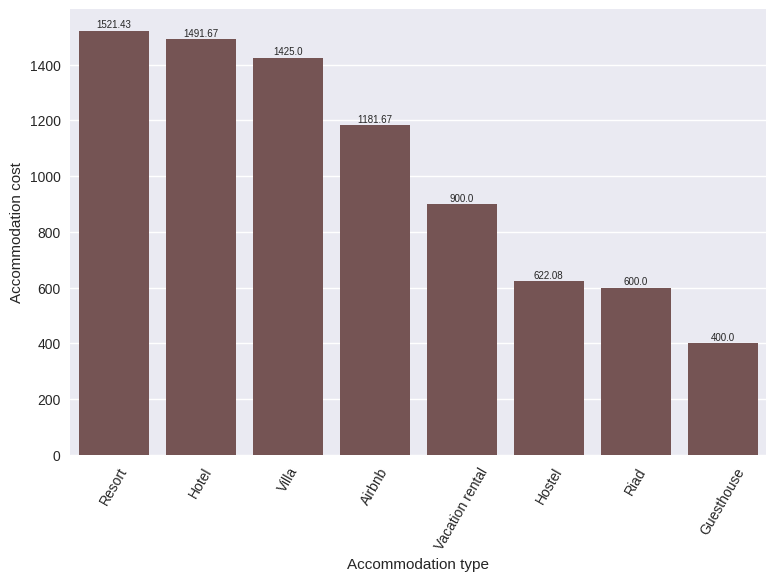

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset
# Preprocess 'Accommodation cost' column to remove non-numeric characters
df['Accommodation cost'] = df['Accommodation cost'].str.replace('[^\d.]', '', regex=True)

# Convert 'Accommodation cost' column to numeric
df['Accommodation cost'] = pd.to_numeric(df['Accommodation cost'], errors='coerce')

# Group by 'Accommodation type' and calculate the mean of 'Accommodation cost'
acc_type_cost = round(df.groupby('Accommodation type')['Accommodation cost'].mean().reset_index().sort_values('Accommodation cost', ascending=False).reset_index(drop=True), 2)

# Plot the barplot
g = sns.barplot(data=acc_type_cost, x='Accommodation type', y='Accommodation cost')
for v in acc_type_cost.itertuples():
    g.text(x=v.Index, y=v._2 + 10, s=str(v._2), size=7, ha="center")
plt.xticks(rotation=60)
plt.show()
